In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [127]:
train_data=pd.read_csv(r'C:\Users\Anmol Gupta\Desktop\Experiments\Projects\Machine Learning\Digit Recognizer\MNIST.csv')

In [128]:
y_train=train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255

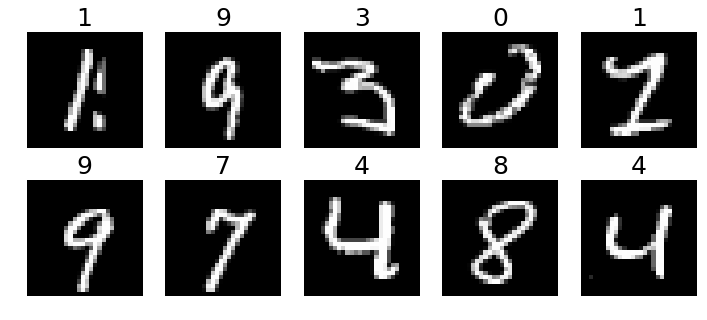

In [133]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [136]:
def ReLu(x):
    x[x<0]=0
    return x

In [139]:
def hypo(X,W,b):
    a1=X
    z1=np.dot(X,W[0])+b[0]
    
    a2=ReLu(z1)
    z2=np.dot(a2, W[1])
    
    s=np.exp(z2)
    total=np.sum(s, axis=1).reshape(-1,1)
    pred=s/total
    
    return pred

In [162]:
def loss(y_pred,y_true):

    global K 
    K = 10
    N = len(y_true)
    
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    # loss_sample is a dimension (N,) array
    # for the final loss, we need take the average
    return -np.mean(loss_sample)

In [163]:
def BackProp(W,b,X,y,alpha=1e-4):
    K = 10
    N = X.shape[0]
    
    
    a1 = X
    
    z1 = np.matmul(X, W[0]) + b[0]
    
    a2 = ReLu(z1)
    
    
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    error2=sigma-y_one_hot_vec
    delW1=np.dot(a2.T, error2)
    
    error1 = np.matmul(error2, W[1].T)*(z1>0)
    delW0 = np.matmul(X.T, error1)
    
    dW = [delW0/N + alpha*W[0], delW1/N + alpha*W[1]]
    db = [np.mean(error1, axis=0)]
    
    return dW, db
    
    
    

In [164]:
eta = 5e-1
alpha = 1e-6 # regularization
gamma = 0.99 # RMSprop
eps = 1e-3 # RMSprop
num_iter = 2000 # number of iterations of gradient descent
n_H = 256 # number of neurons in the hidden layer
n = X_train.shape[1] # number of pixels in an image
K = 10

In [165]:
# initialization
np.random.seed(1127)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

In [167]:
%%time
gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = BackProp(W,b,X_train,y_train,alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(db[0]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 500 == 0:
        # sanity check 1
        y_pred = hypo(X_train,W,b)
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        
        gW0 = gW1 = gb0 = 1

y_pred_final = hypo(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))

Cross-entropy loss after 1 iterations is 0.79426234
Training accuracy after 1 iterations is 79.6548%
Cross-entropy loss after 501 iterations is 0.29683933
Training accuracy after 501 iterations is 90.4595%
Cross-entropy loss after 1001 iterations is 0.032654198
Training accuracy after 1001 iterations is 99.2429%
Cross-entropy loss after 1501 iterations is 0.03877791
Training accuracy after 1501 iterations is 98.9952%
Final cross-entropy loss is 0.032420396
Final training accuracy is 99.1429%
Wall time: 32min 26s
